In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
data = pd.read_csv('honey_purity_dataset.csv')

In [74]:
data.head(5)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


In [75]:
data.isna().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

In [76]:
data.dtypes

CS                 float64
Density            float64
WC                 float64
pH                 float64
EC                 float64
F                  float64
G                  float64
Pollen_analysis     object
Viscosity          float64
Purity             float64
Price              float64
dtype: object

In [77]:
from sklearn.preprocessing import LabelEncoder

data['label_pollen'] = LabelEncoder().fit_transform(data['Pollen_analysis'])

data

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price,label_pollen
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24,3
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85,1
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64,6
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46,3
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62,1
...,...,...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,Rosemary,8261.63,1.00,754.98,13
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,Acacia,6939.39,1.00,543.41,0
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,Chestnut,4139.79,0.64,615.46,6
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,Avocado,4417.74,0.97,949.32,2


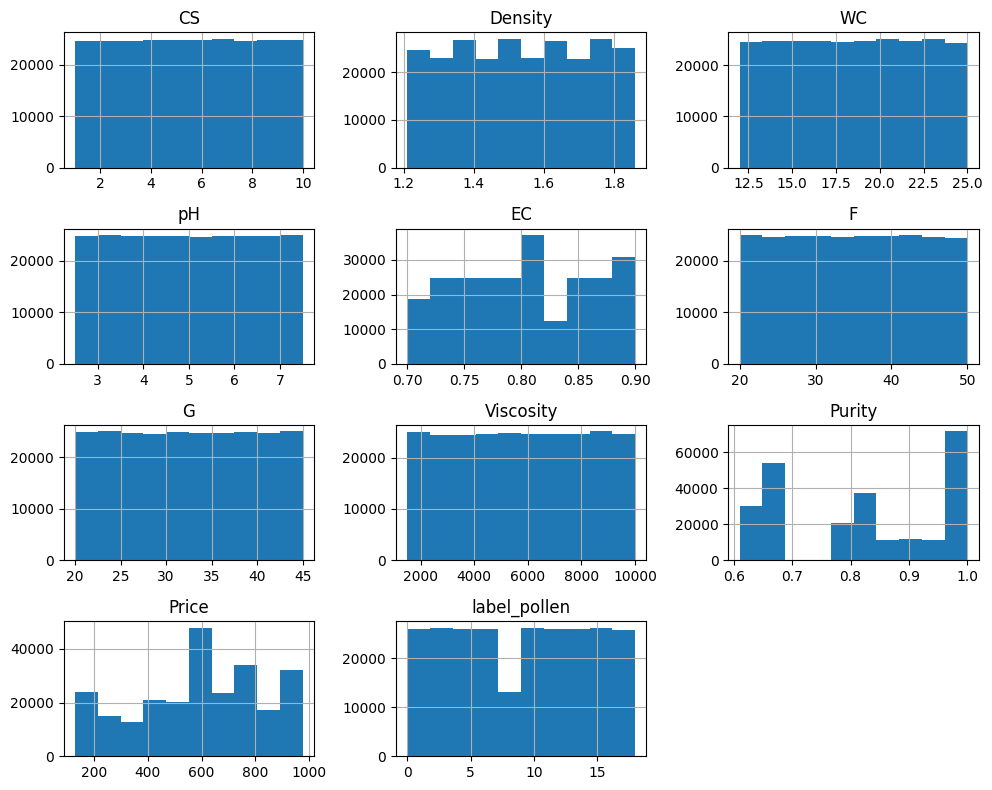

In [78]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [79]:
data.drop(columns=['Pollen_analysis'],inplace=True)


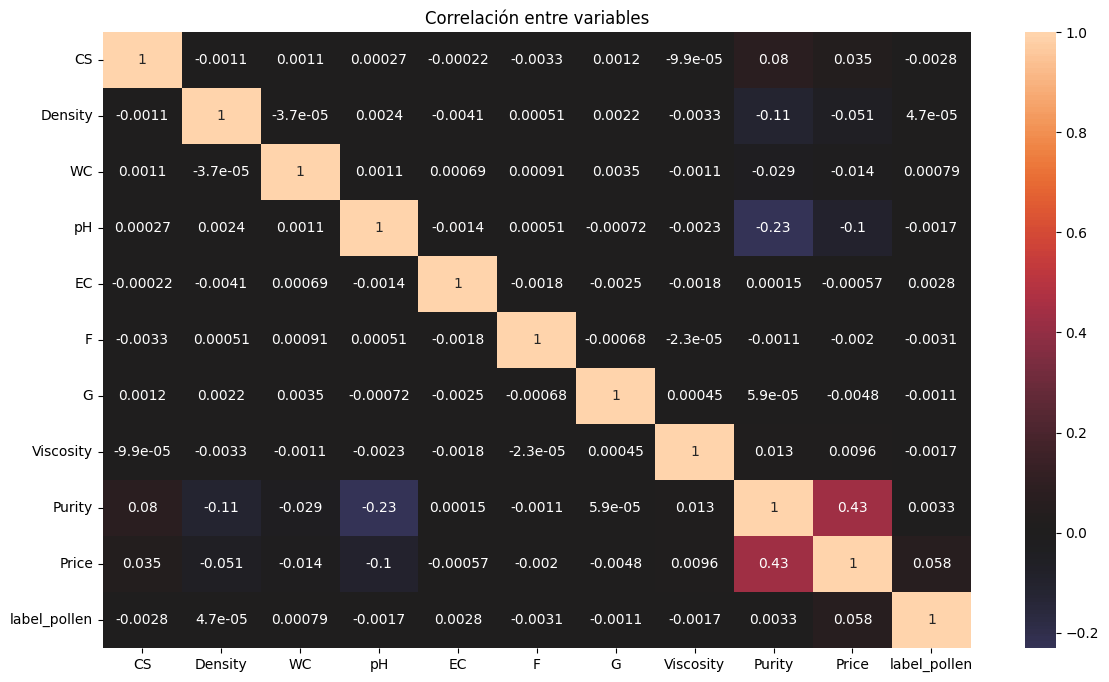

In [80]:
corr_matrix= data.corr()
plt.figure(1, figsize=(14,8))
plt.title('Correlación entre variables')
sns.heatmap(corr_matrix,center=0, annot=True)
plt.show()

In [81]:
#Creacion del modelo
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Y = np.array(data['Price']).reshape(-1, 1)
X = np.array(data['Purity']).reshape(-1,1)

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y)

regresion = LinearRegression()
value = regresion.fit(Xtrain,Ytrain)

value.score(Xtrain,Ytrain)
#print(value.intercept_,value.coef_)

valor = np.array([0.60]).reshape(-1,1)
print(value.predict(valor)[0][0])

432.15611746887976
